In [4]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep,time
from ipycanvas import MultiCanvas, hold_canvas,Canvas
import matplotlib as mpl
import matplotlib.cm as cm


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

In [5]:
x=np.linspace(-5e-6,5e-6,300)
y=np.linspace(-5e-6,5e-6,300)

X,Y=np.meshgrid(x,y)
r=np.array([X,Y,0])

<ipython-input-5-e0517961e834>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  r=np.array([X,Y,0])


In [6]:


import scipy.special as sp

In [7]:
def aperture(r,z=10e-6,R=5e-6,wl=532e-9):
    
    theta=np.arctan(np.sqrt(r**2)/z)
    x=2*np.pi*R*np.sin(theta)/wl
    
    return((2*sp.j1(x)/x)**2)

def caperture(r,z=10e-6,R=5e-6,wl=532e-9):
    
    theta=np.arctan(np.sqrt(r[0]**2+r[1]**2)/z)
    x=2*np.pi*R*np.sin(theta)/wl
    
    return((2*sp.j1(x)/x)**2)

In [8]:
p=caperture(r)

TypeError: loop of ufunc does not support argument 0 of type numpy.ndarray which has no callable arctan method

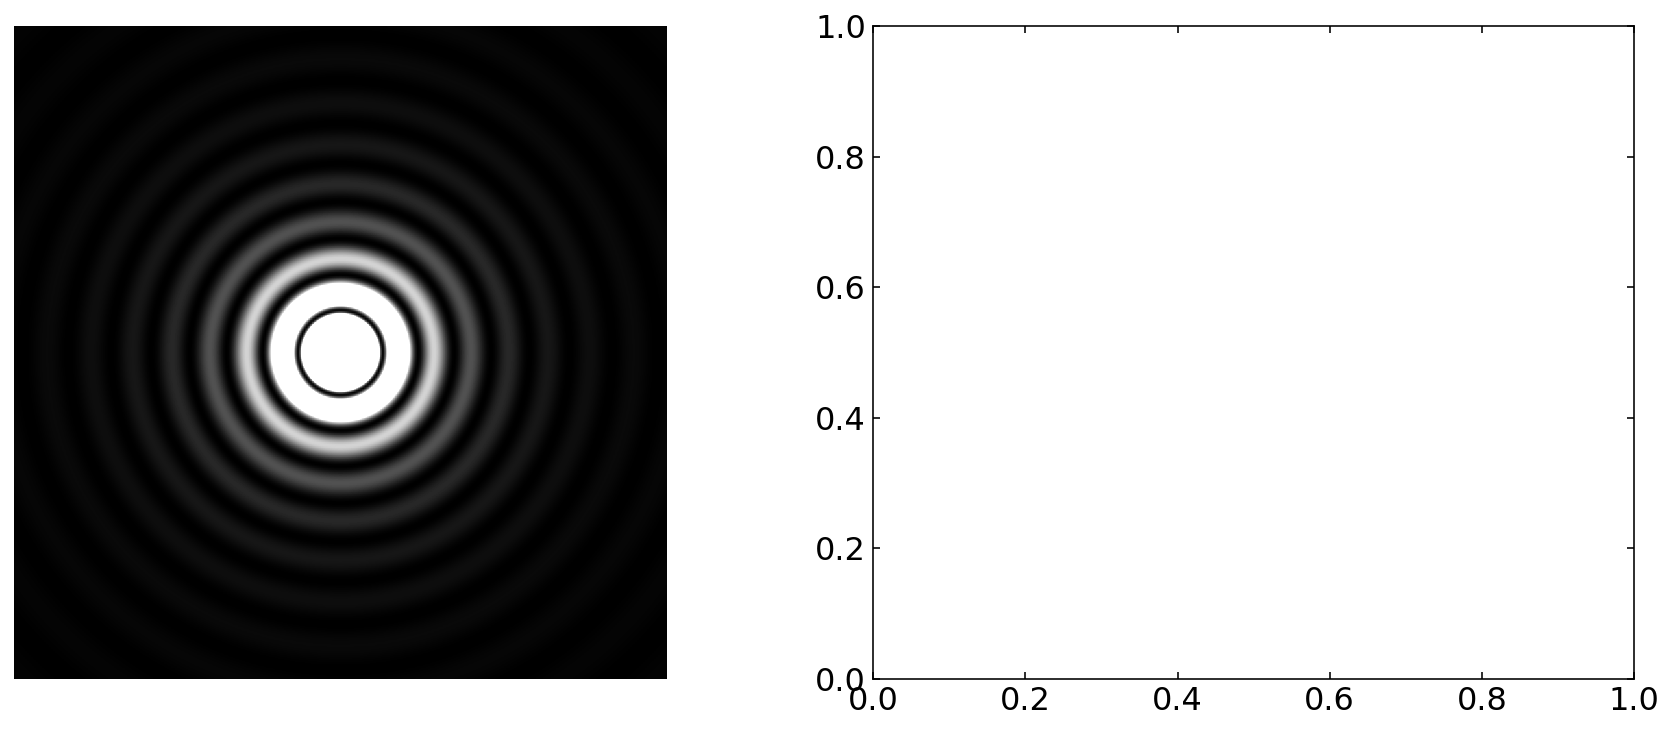

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(p,vmax=0.005,vmin=0.,cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.plot(np.sin(np.arctan(r/10e-6)),(aperture(r)),lw=2)
plt.annotate(r'$0.61\lambda/R$',xy=(0.61*532e-9/5e-6,0),xytext=(0.06,0.4),arrowprops={"width":1,"headwidth":5},fontsize=16)
plt.xlim(0.0,0.4)
plt.xlabel(r"$\sin(\theta)$")
plt.ylabel(r"$I/I_0$")


plt.show()

In [17]:
r=np.linspace(-2e-6,2e-6,301)

<ipython-input-7-aca6c6987ac4>:6: RuntimeWarning: invalid value encountered in true_divide
  return((2*sp.j1(x)/x)**2)


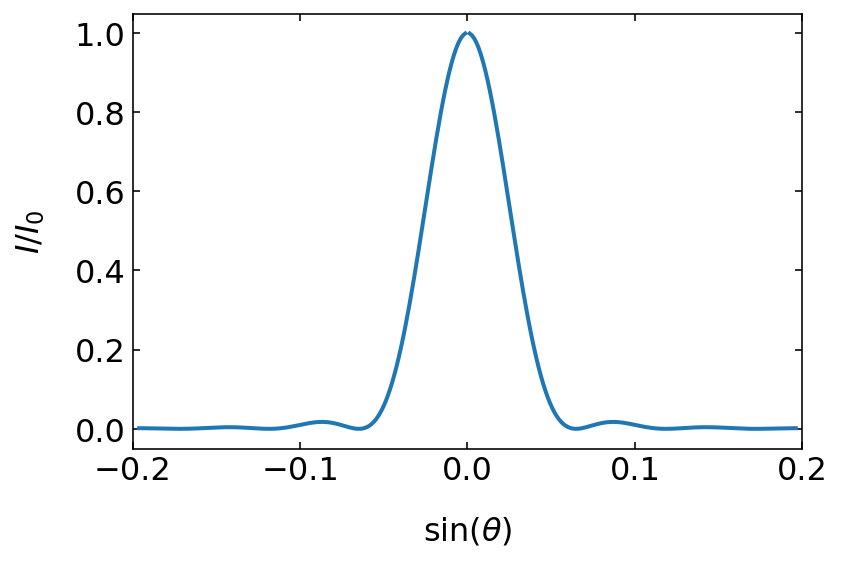

In [19]:
plt.plot(np.sign(r)*np.sin(np.arctan(np.abs(r)/10e-6)),(aperture(r)),lw=2)
#plt.annotate(r'$0.61 \lambda/R$',xy=(0.61*532e-9/5e-6,0),xytext=(0.06,0.4),arrowprops={"width":1,"headwidth":5})
plt.xlim(-0.2,0.2)
plt.xlabel(r"$\sin(\theta)$")
plt.ylabel(r"$I/I_0$")

plt.show()